<a href="https://colab.research.google.com/github/MrData-Science/LinearRegression/blob/main/RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal para predecir la poblacion mundial

## Carga de datos

In [21]:
import pandas as pd
import numpy as np
df = pd.read_csv("/content/World Population Dataset.csv")
df.head(1)

,Rank,country,Capital,Continent,Area (km²),1950,1955,1960,1965,1970 Population,...,1985,1990 Population,1995,2000 Population,2005,2010 Population,2015 Population,2020 Population,2023,World Population Percentage
0,36,Afghanistan,Kabul,Asia,652230,7480461,7971931,8622466,9565147,10752971,...,10512221,10694796,16418912,19542982,24411191,28189672,33753499,38972230,42239854,0.52


## Formato de los datos

In [22]:
format = {'1970 Population': '1970', '1980 Population': '1980','1990 Population': '1990',
                  '2000 Population': '2000','2010 Population': '2010','2015 Population': '2014',
                  '2020 Population': '2020'}
df = df.rename(columns=format)
df.head(1)

,Rank,country,Capital,Continent,Area (km²),1950,1955,1960,1965,1970,...,1985,1990,1995,2000,2005,2010,2014,2020,2023,World Population Percentage
0,36,Afghanistan,Kabul,Asia,652230,7480461,7971931,8622466,9565147,10752971,...,10512221,10694796,16418912,19542982,24411191,28189672,33753499,38972230,42239854,0.52


In [23]:
non_important_features = ['Rank', 'country', 'Capital', 'Continent', 'Area (km²)','World Population Percentage']
year_columns = df.columns.difference(non_important_features)
year_columns

Index(['1950', '1955', '1960', '1965', '1970', '1975', '1980', '1985', '1990',
       '1995', '2000', '2005', '2010', '2014', '2020', '2023'],
      dtype='object')

In [24]:
population_per_year = df[year_columns].sum()
population_per_year

1950    2455313971
1955    2694493716
1960    2958524132
1965    3266302027
1970    3654898484
1975    3978183501
1980    4392382920
1985    4750582812
1990    5249770744
1995    5610981240
2000    6063175407
2005    6415331175
2010    6875120541
2014    7300100361
2020    7695804901
2023    7895718088
dtype: int64

In [25]:
data = {
    'Year': population_per_year.index.astype(int),
    'Population' : population_per_year.values
}
new_df = pd.DataFrame(data)
new_df

,Year,Population
0,1950,2455313971
1,1955,2694493716
2,1960,2958524132
3,1965,3266302027
4,1970,3654898484
5,1975,3978183501
6,1980,4392382920
7,1985,4750582812
8,1990,5249770744
9,1995,5610981240


## Explorando las variables

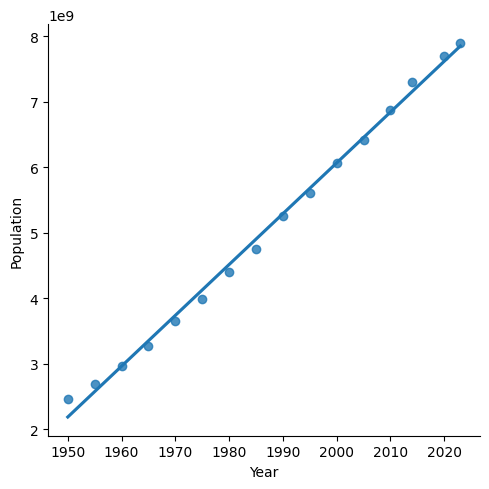

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(x ='Year', y ='Population', data = new_df, order = 1, ci = None)
plt.show()

## Entrenamiento del modelo


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
X = np.array(new_df['Year']).reshape(-1, 1)
y = np.array(new_df['Population']).reshape(-1, 1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.9963660291853796


## Visualización de los resultados

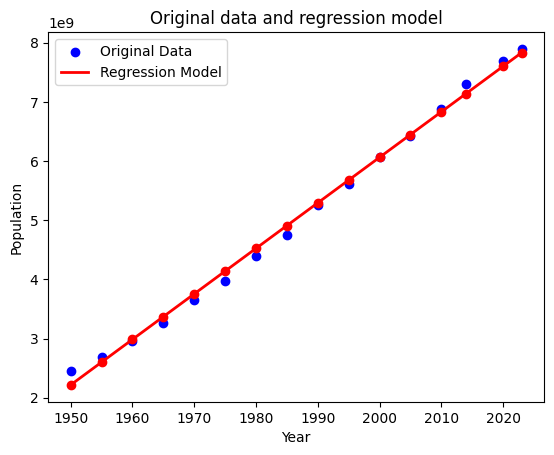

In [31]:
plt.scatter(X, y, color='blue', label='Original Data')

plt.plot(X, regr.predict(X), color='red', linewidth=2, label='Regression Model')
plt.scatter(X, regr.predict(X), color='red')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Original data and regression model')
plt.legend()

plt.show()